In [1]:
import numpy as np
import scipy as sp
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score

%matplotlib inline


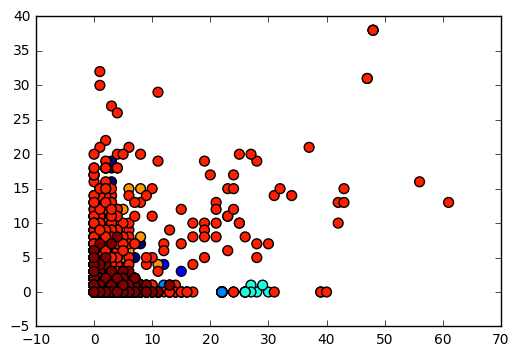

In [2]:
df = pd.read_csv('/home/amal/Téléchargements/train1.csv')
train_data = df.as_matrix()
train_data = np.delete(train_data, 0 , axis=1)
y=train_data[:,93]
X=train_data[:,0:93]
plt.scatter(X[:,0],X[:,6] , c = y, s =50)
# when we plot the the data we can remark that data is intersected ( we can change the feautures for example X[:,0],X[:,50] 
# or X[:,0],X[:,1] ... for  vizualise data we can permute the features each time) 
# it's hard to visulaisz data on dimensions 93


In [3]:
# the data is no clear if it linear or not so the idea is to try with 2 case and decide though the accaurcy of
#each case (linear or not)

# first step is split my train data into 2 ( train and the test ) ",

import random
np.random.shuffle(train_data)

#training data
train= train_data[:58784]
train_y=train[:,93]
train_X=train[:,0:93]

#validation data
test = train_data[58784:61878]
test_y=test[:,93]
test_X=test[:,0:93]




In [ ]:

#linear case
#  variate c in order to choose the best parameters for classification
#  validate step 1
for C in [10**x for x in range(-6,6)]:
    svc = OneVsRestClassifier(svm.LinearSVC(C=C , random_state=0))
    svc.fit(train_X, train_y)
    print("score d'entrainement: for" , C , svc.score(train_X, train_y))
    
#linear case for c= 0.1 because it is the best result 


In [6]:
# validation step 2
svc = OneVsRestClassifier(svm.LinearSVC(C=0.1, random_state=0))
svc.fit(train_X, train_y)


OneVsRestClassifier(estimator=LinearSVC(C=0.1, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=0, tol=0.0001,
     verbose=0),
          n_jobs=1)

In [7]:
#test validation set
print 'predict result is: '
pred = svc.predict(test_X)
print(pred.shape)
print(pred)
print (' accuracy is ' , accuracy_score(test_y, pred))

predict result is: 
(3094,)
[2 1 1 ..., 9 2 6]
(' accuracy is ', 0.73917259211376862)


In [8]:
#test_step
df1 = pd.read_csv('/home/amal/Téléchargements/test.csv')
test_data = df1.as_matrix()
test_data = np.delete(test_data, 0 , axis=1)
#print (test_data.shape)
#print (test_data.shape)
print 'predict result is: '
prediction = svc.predict(test_data)
#print(prediction)
print prediction


predict result is: 
[3 6 6 ..., 3 2 2]


In [58]:
#submission file 

tmp_array = [0,0,0,0,0,0,0,0,0,0]
output_matrix = []
for i in range(0,prediction.shape[0]):
    tmp_array[prediction[i]]=1
    tmp_array[0]=i+1
    output_matrix.append(tmp_array[0:10])
    tmp_array[prediction[i]] = 0
print(np.array(output_matrix))
np.savetxt("/home/amal/mwi.csv", np.array(output_matrix), fmt='%i', delimiter=",")

[[     1      0      0 ...,      0      0      0]
 [     2      0      0 ...,      0      0      0]
 [     3      0      0 ...,      0      0      0]
 ..., 
 [144366      0      0 ...,      0      0      0]
 [144367      0      1 ...,      0      0      0]
 [144368      0      1 ...,      0      0      0]]


In [15]:
#no linear case  rbf
# radial basis function kernel


#train
clf = svm.SVC(decision_function_shape='ovo')
clf.fit(train_X, train_y)
SVC(C=1, class_weight=None, coef0=0.0,decision_function_shape='ovo', degree=3, gamma='auto', kernel='rbf',max_iter=-1, probability=False, random_state=None, shrinking=True,tol=0.001, verbose=False)
print("score d'entrainement:", clf.score(train_X, train_y))




("score d'entrainement: for", 1e-05, 0.75117378878606422)


In [22]:
#validation_step

print 'predict result is: '
clf.decision_function_shape = "ovr"
dec = clf.predict(test_X)
print(dec)
print(dec.shape)


predict result is: 
[2 1 8 ..., 9 2 6]
(3094,)


In [23]:
#test_step
df1 = pd.read_csv('/home/amal/Téléchargements/test.csv')
test_data = df1.as_matrix()
test_data = np.delete(test_data, 0 , axis=1)
clf.decision_function_shape = "ovr"
#print (test_data.shape)
#print (test_data.shape)
print 'predict result is: '
prediction1 = clf.predict(test_data)
#print(prediction)
print prediction1
print(prediction1.shape)

predict result is: 
[3 8 6 ..., 3 2 3]
(144368,)


In [10]:
 # no linear case sigmoid'
    
#train
clf1 = svm.SVC(decision_function_shape='ovo')
clf1.fit(train_X, train_y)
SVC(C=1, class_weight=None, coef0=0.0,decision_function_shape='ovo', degree=3, gamma='auto', kernel='sigmoid',max_iter=-1, probability=False, random_state=None, shrinking=True,tol=0.001, verbose=False)
print("score d'entrainement:", clf1.score(train_X, train_y))

("score d'entrainement:", 0.86671543277082197)


In [12]:
#validation_step

print 'predict result is: '
clf1.decision_function_shape = "ovr"
dec1 = clf1.predict(test_X)
print (' accuracy is ' , accuracy_score(test_y, dec1))
print(dec1)
print(dec.shape)

predict result is: 
(' accuracy is ', 0.78021978021978022)
[2 3 3 ..., 8 2 9]
(3094,)


In [13]:
#test_step
df1 = pd.read_csv('/home/amal/Téléchargements/test.csv')
test_data = df1.as_matrix()
test_data = np.delete(test_data, 0 , axis=1)
clf1.decision_function_shape = "ovr"
#print (test_data.shape)
#print (test_data.shape)
print 'predict result is: '
prediction2 = clf1.predict(test_data)
#print(prediction)
print prediction2
print(prediction2.shape)

predict result is: 
[3 8 6 ..., 3 4 3]
(144368,)


In [ ]:
#train
#for choosing the best degree for the kernel polynomial
for d in range(2,8):
    clf2= svm.SVC(decision_function_shape='ovo')
    clf2.fit(train_X, train_y)
    SVC(C=1, class_weight=None, coef0=0.0,decision_function_shape='ovo', degree=d, gamma='auto', kernel='poly',max_iter=-1, probability=False, random_state=None, shrinking=True,tol=0.001, verbose=False)
    print("score d'entrainement for",d, clf2.score(train_X, train_y))
#the best result is 3

In [5]:
clf3 = svm.SVC(decision_function_shape='ovo')
clf3.fit(train_X, train_y)
SVC(C=1, class_weight=None, coef0=0.0,decision_function_shape='ovo', degree=3, gamma='auto', kernel='poly',max_iter=-1, probability=False, random_state=None, shrinking=True,tol=0.001, verbose=False)
print("score d'entrainement:", clf3.score(train_X, train_y))

("score d'entrainement:", 0.86646026129559062)


In [10]:
print 'predict result is: '
clf3.decision_function_shape = "ovr"
dec4= clf3.predict(test_X)
print (' accuracy is ' , accuracy_score(test_y, dec4))
print(dec4)
print(dec4.shape)

predict result is: 
(' accuracy is ', 0.79444085326438263)
[8 6 6 ..., 5 5 5]
(3094,)


In [13]:
df1 = pd.read_csv('/home/amal/Téléchargements/test.csv')
test_data = df1.as_matrix()
test_data = np.delete(test_data, 0 , axis=1)
clf3.decision_function_shape = "ovr"
#print (test_data.shape)
#print (test_data.shape)
print 'predict result is: '
prediction4= clf3.predict(test_data)
#print(prediction)
print prediction4
print(prediction4.shape)

predict result is: 
[3 8 6 ..., 3 4 3]
(144368,)


In [15]:
tmp_array = [0,0,0,0,0,0,0,0,0,0]
output_matrix = []
for i in range(0,prediction4.shape[0]):
    tmp_array[prediction4[i]]=1
    tmp_array[0]=i+1
    output_matrix.append(tmp_array[0:10])
    tmp_array[prediction4[i]] = 0
print(np.array(output_matrix))
np.savetxt("/home/amal/mwi10.csv", np.array(output_matrix), fmt='%i', delimiter=",")

[[     1      0      0 ...,      0      0      0]
 [     2      0      0 ...,      0      1      0]
 [     3      0      0 ...,      0      0      0]
 ..., 
 [144366      0      0 ...,      0      0      0]
 [144367      0      0 ...,      0      0      0]
 [144368      0      0 ...,      0      0      0]]


clf = svm.SVC(decision_function_shape='ovo')
>>> clf.fit(X, Y) 
SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovo', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)